# Perceptron
Notice `Linear` that happened to show in task

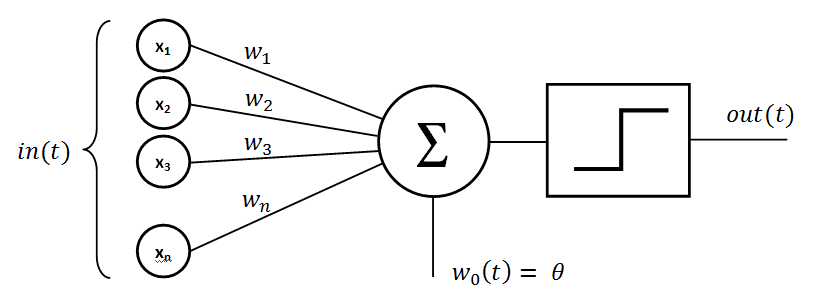

### Create a Perceptron (See task answer)

In [8]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

class OnePerceptronModel(nn.Module):
    def __init__(self, *args, **kwargs) -> None:
        super().__init__(*args, **kwargs)
        self.fc = nn.Linear(in_features=1, out_features=1)

    def forward(self, x) -> None:
        return self.fc(x)

In [9]:
model = OnePerceptronModel()

model.state_dict()

OrderedDict([('fc.weight', tensor([[-0.1373]])),
             ('fc.bias', tensor([-0.9300]))])

# Circles Classification Problem

In [10]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

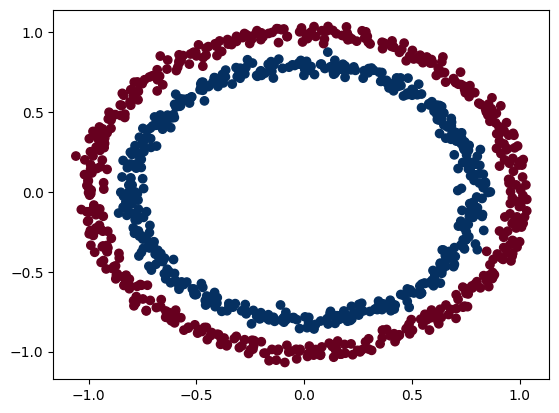

In [11]:
n_samples = 1000

X, y = make_circles(n_samples=n_samples,
    noise=0.03,
    random_state=42,
)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdBu);

In [12]:
import torch
from sklearn.model_selection import train_test_split

X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

print(f"Train Shape: {X_train.shape} | Test Shape: {X_test.shape}")


Train Shape: torch.Size([800, 2]) | Test Shape: torch.Size([200, 2])


In [13]:
class CircleLinear(nn.Module):
    def __init__(self, *args, **kwargs) -> None:
        super().__init__(*args, **kwargs)
        self.fc = nn.Linear(2, 1)

    def forward(self, x):
        return torch.squeeze(self.fc(x))
    
circle_linear = CircleLinear()

In [14]:
import torch.optim as optim
loss_function = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(circle_linear.parameters(), lr=0.01)

In [25]:
from helper_functions import plot_decision_boundary

def plot_boundaries(
    model: nn.Module,
    train_data: torch.Tensor = X_train,
    train_labels: torch.Tensor = y_train,
    test_data: torch.Tensor = X_test,
    test_labels: torch.Tensor = y_test,
    ):
    plt.figure(figsize=(12, 6))
    
    plt.subplot(1, 2, 1)
    plt.title("Train")
    plot_decision_boundary(model, train_data, train_labels)
    plt.subplot(1, 2, 2)
    plt.title("Test")
    plot_decision_boundary(model, test_data, test_labels)

def train(
        model: nn.Module,
        loss_function: nn.Module = loss_function,
        optimizer: optim.Optimizer = optimizer,
        train_data: torch.Tensor = X_train,
        train_labels: torch.Tensor = y_train,
        test_data: torch.Tensor = X_test,
        test_labels: torch.Tensor = y_test,
        num_epochs: int = 100,
    ):
    epochs_count, train_loss_arr, test_loss_arr = [], [], []
    for epoch in range(num_epochs):
        model.train()

        y_preds = model(train_data)

        loss = loss_function(y_preds, train_labels)
        loss.backward()

        optimizer.step()
        optimizer.zero_grad()

        model.eval()
        with torch.inference_mode():
            y_preds = model(test_data)
            test_loss = loss_function(y_preds, test_labels)

            if epoch % 10 == 0:
                epochs_count.append(epoch)
                train_loss_arr.append(loss.detach().numpy())
                test_loss_arr.append(test_loss.detach().numpy())
                print(f"Epoch {epoch}: train loss {loss}, test loss {test_loss}")
    return epochs_count, train_loss_arr, test_loss_arr


def predict(model: nn.Module, data: torch.Tensor) -> torch.Tensor:
    model.eval()
    with torch.inference_mode():
        return model(data)
    
def plot_stats(
        epochs: list,
        train_loss: list,
        test_loss: list,
    ):
    plt.figure(figsize=(10, 5))
    plt.plot(epochs, train_loss, label='Train loss')
    plt.plot(epochs, test_loss, label='Test loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

In [26]:
epochs_count, train_loss, test_loss = train(circle_linear, num_epochs=1000)

Epoch 0: train loss 0.7073620557785034, test loss 0.7142281532287598
Epoch 10: train loss 0.7073620557785034, test loss 0.7142281532287598
Epoch 20: train loss 0.7073620557785034, test loss 0.7142281532287598
Epoch 30: train loss 0.7073620557785034, test loss 0.7142281532287598
Epoch 40: train loss 0.7073620557785034, test loss 0.7142281532287598
Epoch 50: train loss 0.7073620557785034, test loss 0.7142281532287598
Epoch 60: train loss 0.7073620557785034, test loss 0.7142281532287598
Epoch 70: train loss 0.7073620557785034, test loss 0.7142281532287598
Epoch 80: train loss 0.7073620557785034, test loss 0.7142281532287598
Epoch 90: train loss 0.7073620557785034, test loss 0.7142281532287598
Epoch 100: train loss 0.7073620557785034, test loss 0.7142281532287598
Epoch 110: train loss 0.7073620557785034, test loss 0.7142281532287598
Epoch 120: train loss 0.7073620557785034, test loss 0.7142281532287598
Epoch 130: train loss 0.7073620557785034, test loss 0.7142281532287598
Epoch 140: train 

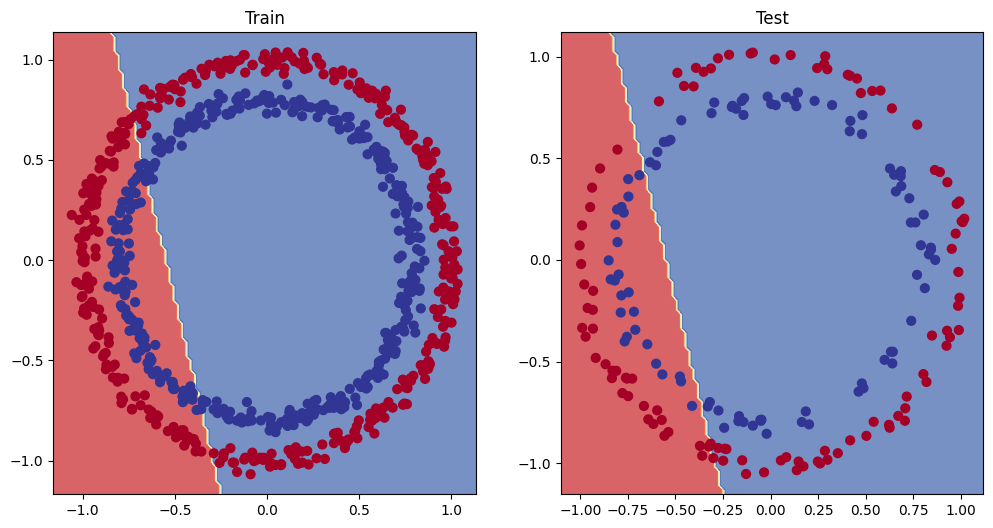

In [27]:
plot_boundaries(circle_linear)

# Activation Function

### Go [Here](https://playground.tensorflow.org/)

In [16]:
class CircleModel(nn.Module):
    def __init__(self, *args, **kwargs) -> None:
        super().__init__(*args, **kwargs)
        self.block = nn.Sequential(
            nn.Linear(2, 10),
            nn.ReLU(),
            nn.Linear(10, 10),
            nn.ReLU(),
            nn.Linear(10, 1),
        )

    def forward(self, x):
        return torch.squeeze(self.block(x))

In [17]:
model = CircleModel()

model.state_dict()

OrderedDict([('block.0.weight',
              tensor([[-0.1214, -0.3323],
                      [-0.0291,  0.6186],
                      [ 0.6036,  0.6697],
                      [-0.3913,  0.4186],
                      [-0.5775, -0.1636],
                      [-0.6760,  0.2064],
                      [ 0.0672, -0.2282],
                      [-0.3823, -0.5673],
                      [ 0.1676, -0.1931],
                      [ 0.5591,  0.6768]])),
             ('block.0.bias',
              tensor([ 0.2532, -0.5299,  0.3250, -0.6211, -0.5197, -0.0611,  0.4870, -0.0859,
                       0.0683, -0.0454])),
             ('block.2.weight',
              tensor([[-0.2944, -0.1431,  0.1684,  0.1432,  0.1490,  0.1278,  0.2119,  0.1001,
                       -0.1555,  0.0127],
                      [-0.0794,  0.2519,  0.1854,  0.0443, -0.2544,  0.1732,  0.0040,  0.0639,
                       -0.3125, -0.0420],
                      [-0.2127,  0.1656, -0.2819, -0.3069, -0.2337,  0.1

In [18]:
from torchinfo import summary

summary(model)

Layer (type:depth-idx)                   Param #
CircleModel                              --
├─Sequential: 1-1                        --
│    └─Linear: 2-1                       30
│    └─ReLU: 2-2                         --
│    └─Linear: 2-3                       110
│    └─ReLU: 2-4                         --
│    └─Linear: 2-5                       11
Total params: 151
Trainable params: 151
Non-trainable params: 0

In [19]:
import torch.optim as optim

loss_function = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

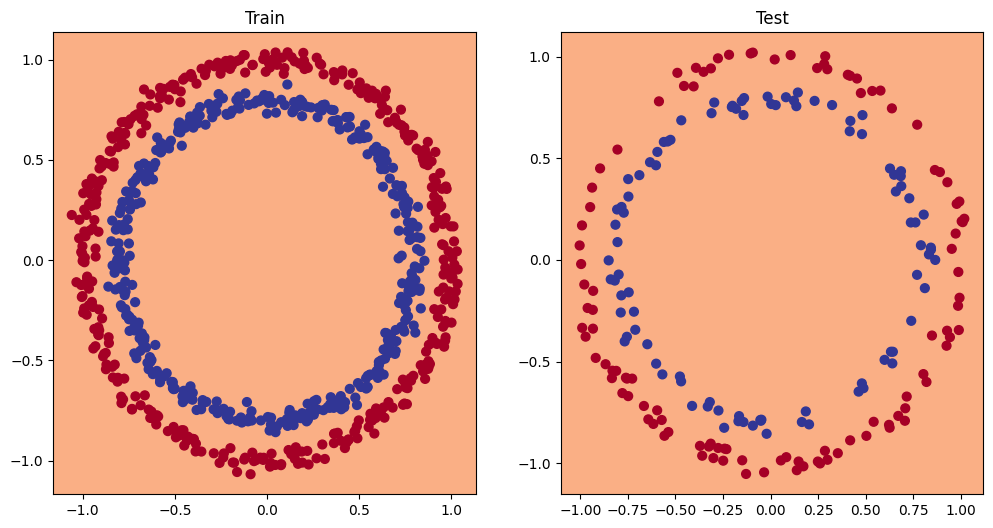

In [20]:
plot_boundaries(model)

In [21]:
epochs_count, train_loss, test_loss = train(model, num_epochs=1000)

Epoch 0: train loss 0.6973333954811096, test loss 0.6929790377616882
Epoch 10: train loss 0.6973333954811096, test loss 0.6929790377616882
Epoch 20: train loss 0.6973333954811096, test loss 0.6929790377616882
Epoch 30: train loss 0.6973333954811096, test loss 0.6929790377616882
Epoch 40: train loss 0.6973333954811096, test loss 0.6929790377616882
Epoch 50: train loss 0.6973333954811096, test loss 0.6929790377616882
Epoch 60: train loss 0.6973333954811096, test loss 0.6929790377616882
Epoch 70: train loss 0.6973333954811096, test loss 0.6929790377616882
Epoch 80: train loss 0.6973333954811096, test loss 0.6929790377616882
Epoch 90: train loss 0.6973333954811096, test loss 0.6929790377616882
Epoch 100: train loss 0.6973333954811096, test loss 0.6929790377616882
Epoch 110: train loss 0.6973333954811096, test loss 0.6929790377616882
Epoch 120: train loss 0.6973333954811096, test loss 0.6929790377616882
Epoch 130: train loss 0.6973333954811096, test loss 0.6929790377616882
Epoch 140: train 

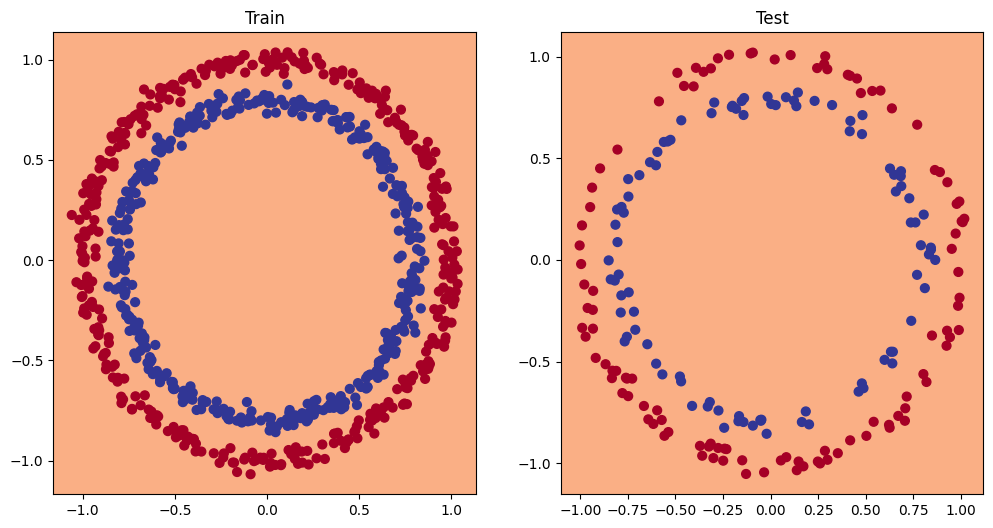

In [22]:
plot_boundaries(model)

In [23]:
x = torch.tensor([0.0, -0.5])

with torch.inference_mode():
    y_preds = model(x)
    y_preds = torch.sigmoid(y_preds)
    y_preds = torch.round(y_preds)

y_preds

tensor(0.)

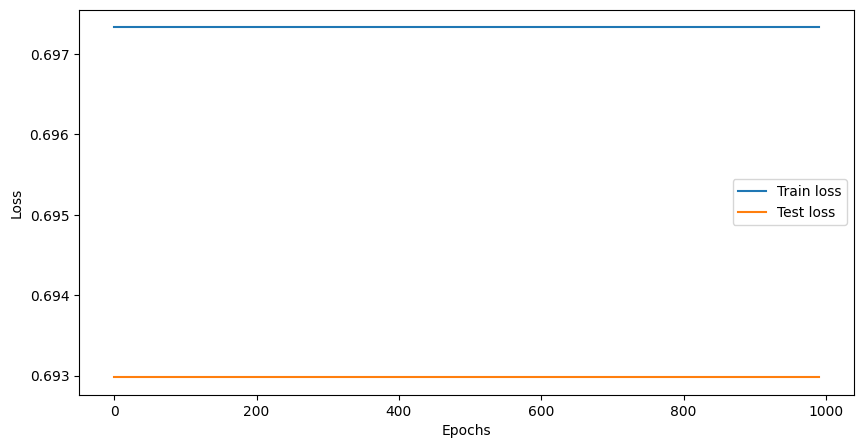

In [24]:
plot_stats(epochs_count, train_loss, test_loss)

# <font color="green">Blob Solver Exercise</font>

# <font color="green">MNist Solver Exercise</font>

# Terminologies & Recap
1. **Activation Function**: A function that decides whether a neuron should be activated or not by calculating the weighted sum and further adding bias with it. The purpose of the activation function is to introduce non-linearity into the output of a neuron.


2. **Overfitting**: Overfitting occurs when a model learns the detail and noise in the training data to the extent that it negatively impacts the performance of the model on new data.
3. **Underfitting**: Underfitting occurs when a model is too simple to learn the underlying structure of the data.